In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

train_dir = "/content/drive/MyDrive/dataset/brain_tumor/train"
test_dir = "/content/drive/MyDrive/dataset/brain_tumor/test"
categories = ["tumor_var", "tumor_yok"]
image_size = (180, 180)

In [ ]:

def load_data(directory):
    images, labels = [], []
    for category in categories:
        label = categories.index(category)
        path = os.path.join(directory, category)
        for img in os.listdir(path):
            try:
                img_path = os.path.join(path, img)
                image = cv2.imread(img_path)
                if image is None:
                    continue
                image = cv2.resize(image, image_size)
                image = image / 255.0
                images.append(image)
                labels.append(label)
            except:
                continue
    return np.array(images), np.array(labels)


In [ ]:

train_images, train_labels = load_data(train_dir)
test_images, test_labels = load_data(test_dir)


In [ ]:
for category in categories:
    path = os.path.join(train_dir, category)
    num_images = len(os.listdir(path))
    print(f"📁 '{category}' klasöründe {num_images} adet görsel var.")


📁 'tumor_var' klasöründe 4117 adet görsel var.
📁 'tumor_yok' klasöründe 1595 adet görsel var.


In [ ]:
for category in categories:
    path = os.path.join(test_dir, category)
    num_images = len(os.listdir(path))
    print(f"📁 '{category}' klasöründe {num_images} adet görsel var.")


📁 'tumor_var' klasöründe 906 adet görsel var.
📁 'tumor_yok' klasöründe 405 adet görsel var.


In [ ]:

class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(train_labels),
                                                  y=train_labels)
class_weights_dict = dict(enumerate(class_weights))
print("🎯 Class weights:", class_weights_dict)


🎯 Class weights: {0: 0.6937090114160797, 1: 1.7905956112852666}


In [ ]:

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=40,
                    batch_size=16,
                    class_weight=class_weights_dict,
                    callbacks=[early_stopping])


Epoch 1/40
357/357 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.7692 - loss: 0.6507 - val_accuracy: 0.9329 - val_loss: 0.2049
Epoch 2/40
357/357 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9562 - loss: 0.1544 - val_accuracy: 0.9443 - val_loss: 0.1611
Epoch 3/40
357/357 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9642 - loss: 0.1102 - val_accuracy: 0.9428 - val_loss: 0.1199
Epoch 4/40
357/357 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9742 - loss: 0.0821 - val_accuracy: 0.9497 - val_loss: 0.1255
Epoch 5/40
357/357 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9777 - loss: 0.0519 - val_accuracy: 0.9672 - val_loss: 0.0634
Epoch 6/40
357/357 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9835 - loss: 0.0512 - val_accuracy: 0.9580 - val_loss: 0.0821
Epoch 7/40
357/357 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9831 - loss: 0.0373 - val_accuracy: 0.9756 - val_loss: 0.0539
Epoch 8/40
357/357 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9828 - loss: 0.0338 - val_acc

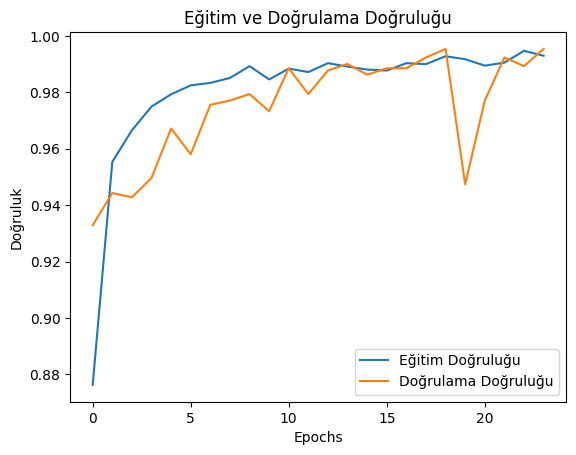

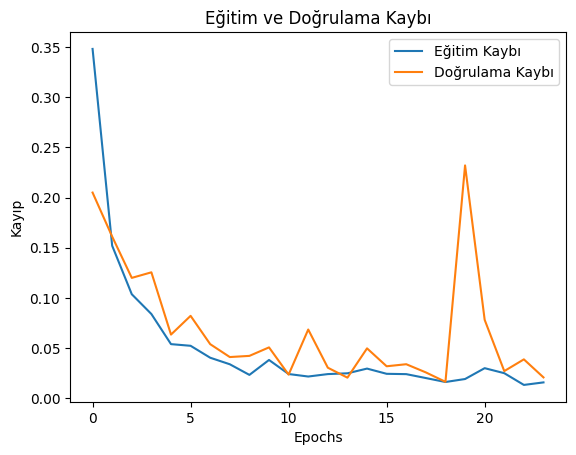

In [ ]:

plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.legend()
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.show()

plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()
plt.title('Eğitim ve Doğrulama Kaybı')
plt.show()


In [ ]:

predictions = model.predict(test_images)
predicted_labels = (predictions > 0.5).astype("int32").flatten()


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [ ]:

print("Sınıflandırma Raporu:")
print(classification_report(test_labels, predicted_labels, target_names=categories))


Sınıflandırma Raporu:
              precision    recall  f1-score   support

   tumor_var       1.00      0.99      1.00       906
   tumor_yok       0.99      1.00      0.99       405

    accuracy                           1.00      1311
   macro avg       0.99      1.00      0.99      1311
weighted avg       1.00      1.00      1.00      1311



In [ ]:
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')

print(f"Doğruluk (Accuracy): {accuracy}")
print(f"Duyarlılık (Precision): {precision}")
print(f"Hatırlama (Recall): {recall}")
print(f"F1 Skoru: {f1}")


Doğruluk (Accuracy): 0.9954233409610984
Duyarlılık (Precision): 0.9954901535018124
Hatırlama (Recall): 0.9954233409610984
F1 Skoru: 0.9954325644897947


In [ ]:

model.save("/content/drive/MyDrive/Colab Notebooks/models/beyin_tumoru_0105_1.h5")

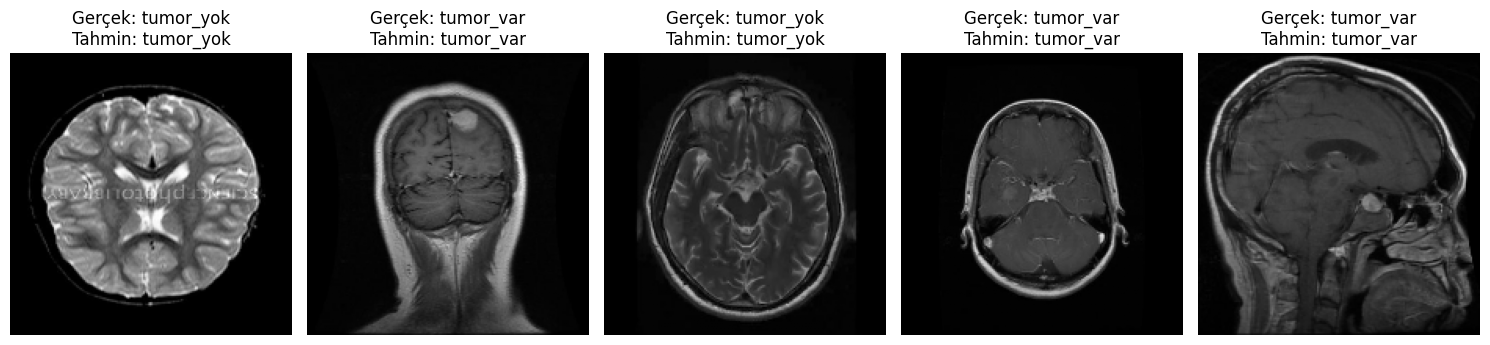

In [ ]:

categories = ["tumor_var", "tumor_yok"]

plt.figure(figsize=(15, 5))

for i in range(5):
    idx = np.random.randint(0, len(test_images))

    image = test_images[idx]
    true_label = test_labels[idx]
    predicted_label = predicted_labels[idx]

    plt.subplot(1, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Gerçek: {categories[true_label]}\nTahmin: {categories[predicted_label]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

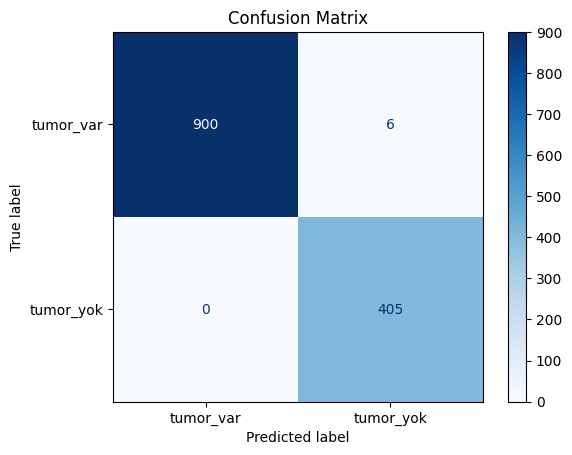

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_labels, predicted_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


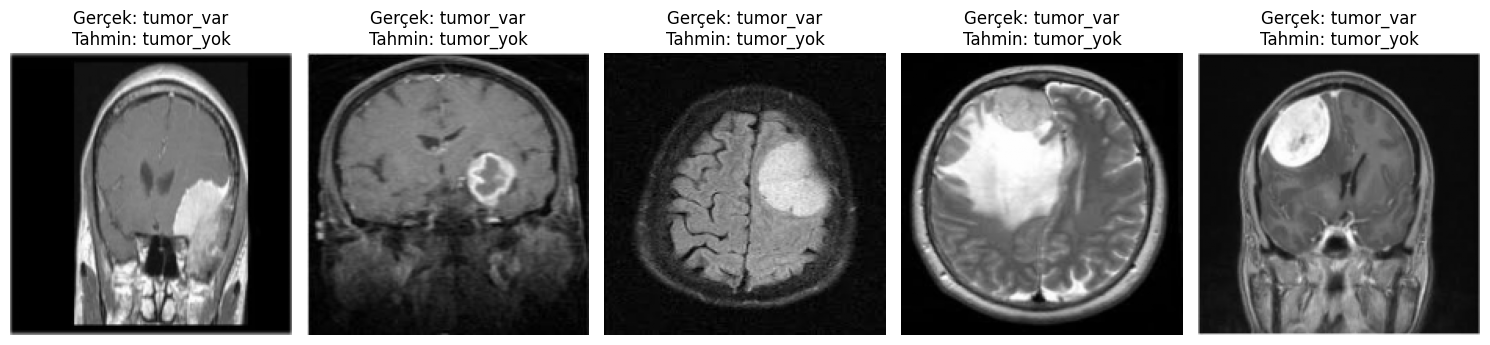

In [ ]:

wrong_indices = np.where(predicted_labels != test_labels)[0]


plt.figure(figsize=(15, 5))

for i in range(5):
    idx = wrong_indices[i]
    image = test_images[idx]
    true_label = test_labels[idx]
    predicted_label = predicted_labels[idx]

    plt.subplot(1, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Gerçek: {categories[true_label]}\nTahmin: {categories[predicted_label]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


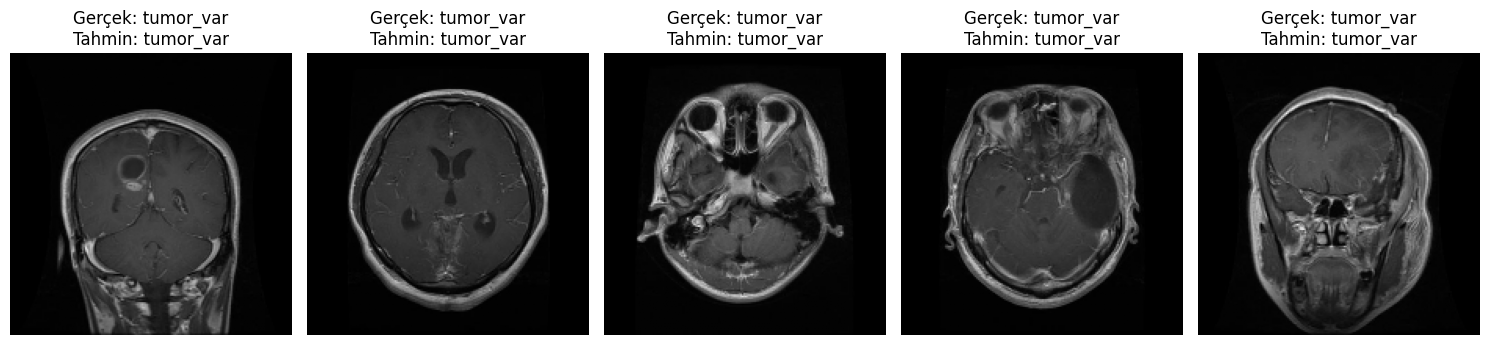

In [ ]:

correct_indices = np.where(predicted_labels == test_labels)[0]


plt.figure(figsize=(15, 5))

for i in range(5):
    idx = correct_indices[i]
    image = test_images[idx]
    true_label = test_labels[idx]
    predicted_label = predicted_labels[idx]

    plt.subplot(1, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Gerçek: {categories[true_label]}\nTahmin: {categories[predicted_label]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
